<div style=" background-color: rgb(43, 197, 37);" >
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Data & tests statistiques
</h2>
</div>

In [232]:
import pandas as pd
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt 
import seaborn as sns

np.set_printoptions(precision=2)

import scipy.stats as stats
from scipy.stats import ttest_1samp
from scipy.stats import f_oneway
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import kstest

In [233]:
df_stat = pd.read_csv('../Source/Data_processed/lapage_all.csv', sep=';', index_col=['Timestamp'] , parse_dates=True)

In [234]:
df_stat['categ'] = df_stat['categ'].astype(str)
df_stat['month'] = df_stat.index.month #ajout d'une colonne mois pour stratifier les échantillons plus tard
df_stat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 687534 entries, 2021-03-01 00:01:07.843138 to 2023-02-28 23:58:30.792755
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     687534 non-null  object 
 1   session_id  687534 non-null  object 
 2   client_id   687534 non-null  object 
 3   sex         687534 non-null  object 
 4   birth       687534 non-null  int64  
 5   price       687534 non-null  float64
 6   categ       687534 non-null  object 
 7   month       687534 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 44.6+ MB


In [235]:
# Création de la colonne combinée 'strata'
df_stat['strat_sex_categ_mois'] = df_stat['categ'] + "_" + df_stat['sex'] + "_" + df_stat['month'].astype(str)
df_stat

,id_prod,session_id,client_id,sex,birth,price,categ,month,strat_sex_categ_mois
Timestamp,,,,,,,,,
2021-03-01 00:01:07.843138,0_1259,s_1,c_329,f,1967,11.99,0,3,0_f_3
2021-03-01 00:02:26.047414,0_1390,s_2,c_664,m,1960,19.37,0,3,0_m_3
2021-03-01 00:02:38.311413,0_1352,s_3,c_580,m,1988,4.50,0,3,0_m_3
2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,f,1989,6.55,0,3,0_f_3
2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,f,1956,16.49,0,3,0_f_3
...,...,...,...,...,...,...,...,...,...
2023-02-28 23:49:03.148402,1_508,s_348444,c_3573,f,1996,21.92,1,2,1_f_2
2023-02-28 23:51:29.318531,2_37,s_348445,c_50,f,1994,48.99,2,2,2_f_2
2023-02-28 23:53:18.929676,1_695,s_348446,c_488,f,1985,26.99,1,2,1_f_2


#### Mes données sont-elles numériques (quantitatives) ou catégoriques (qualitatives) ?
- J'ai 2 variables quantitative et 5 variables catégoriques
#### Ecrire toutes les questions que je me pose

#### Quel est le nombre de groupes ou de variables que je compare ?

#### Quel est l'objectif de mon étude ? Que cherche-je à déterminer ou à comparer ?

<div style=" background-color: rgb(343, 197, 37);" >
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center"> Partie 1 - Test de normalité des données
</h2>
</div>

----
## Test de normalité sur une variable : prix
---

---
### 1.1 Choisir la variable à tester (variable quanti) -> Prix
---

In [236]:
df_stat['price'].head(2)

Timestamp
2021-03-01 00:01:07.843138    11.99
2021-03-01 00:02:26.047414    19.37
Name: price, dtype: float64

#### H0 : la variable prix suit une loi normal p > 0,05
#### H1 : la variable prix ne suit pas une loi normal p < 0,05


---
### 1.2 - Décrire la variable (moyenne , écart-type (std) , variance (var) 
---

In [237]:
print(f"la moyenne (x barre) théorique est {round(df_stat['price'].mean(), 2)}")
print(f"l'écart type ou stand.dev. (sigma) théorique est {round(df_stat['price'].std(), 2)}")
print(f"la variance (sigma carré) théorique est de {round(df_stat['price'].var(), 2)}")

la moyenne (x barre) théorique est 17.49
l'écart type ou stand.dev. (sigma) théorique est 18.24
la variance (sigma carré) théorique est de 332.64


---
### 1.3 - Détérminer un échantillon (mathématiquement)
---

In [238]:
## Fixation de la taille de l'échantillon       
import math

# Paramètres
marge_erreur = 1
niveau_confiance = 0.95
ecart_type_estime = 18.24  # Écart-type estimé des prix dans votre dataset

# Z-score pour un niveau de confiance de 95%
z_score = 1.96  # Pour un niveau de confiance de 95%

# Taille de l'échantillon
taille_echantillon_prix = (z_score * ecart_type_estime / marge_erreur) ** 2
taille_echantillon_prix = math.ceil(taille_echantillon_prix)  # Arrondir à l'entier supérieur

display("Taille d'échantillon nécessaire :", taille_echantillon_prix)


"Taille d'échantillon nécessaire :"

1279

---
### 1.4 - Stratifié l'échantillon pour fiabiliser la représentativité des données
---

- le sexe (650 hommes et 650 femmes)

In [239]:
from sklearn.model_selection import StratifiedShuffleSplit

taille_echantillon_prix = 1300 #je fixe la taille de l'échantillon à 1300

sss = StratifiedShuffleSplit(n_splits=100, test_size=taille_echantillon_prix, random_state=9000) #j'initialise l'objet StratifiedShuffleSplit pour générer un échantillon stratifié de 1300 individus

for train_index, test_index in sss.split(df_stat, df_stat['strat_sex_categ_mois']): #je génère l'échantillon stratifié selon la variable sex
    echantillon_stratifie = df_stat.iloc[test_index] #je récupère l'échantillon stratifié
    
print(echantillon_stratifie.head(1)) #j'affiche la premières lignes de l'échantillon stratifié
display("-----------------------------")
print(echantillon_stratifie['strat_sex_categ_mois'].value_counts()) #je vérifie

                           id_prod session_id client_id sex  birth  price  \
Timestamp                                                                   
2022-06-02 15:31:48.781946  0_2231   s_217778    c_3095   m   1981  13.99   

                           categ  month strat_sex_categ_mois  
Timestamp                                                     
2022-06-02 15:31:48.781946     0      6                0_m_6  


'-----------------------------'

strat_sex_categ_mois
0_m_9     39
0_f_9     37
0_f_5     35
0_m_10    35
0_m_5     35
          ..
2_f_12     2
2_m_12     2
2_m_9      2
2_f_9      2
2_f_3      2
Name: count, Length: 72, dtype: int64


---
### 1.5 - Appliquer le test de Kosmogorov-Smirnov
---

In [240]:
moyenne_empirique_prix =echantillon_stratifie['price'].mean() #je calcule la moyenne des prix dans l'échantillon stratifié
variante_empirique_prix = echantillon_stratifie['price'].std() #je calcule l'écart-type des prix dans l'échantillon stratifié
display(round(moyenne_empirique_prix, 2))
display(round(variante_empirique_prix, 2))
display("-----------------------------")

stat, p_value = kstest(echantillon_stratifie['price'], 'norm', args=(moyenne_empirique_prix, np.sqrt(variante_empirique_prix))) #je teste la normalité de la distribution des prix dans l'échantillon stratifié

display("-----------------------------")

print("Statistique de test KS:", round(stat, 5), 'un resultat proche de 0 indique que la distribution des prix est normale')
print("Valeur p:", np.format_float_positional(p_value, precision=2), ': un resultat supérieur à 0.05 indique que la distribution des prix est normale')

display("-----------------------------")

if p_value > 0.05:
    print("La distribution des prix est normale -> l'hypothèse nulle H0 n'est pas rejetée")
else:
    print("La distribution des prix n'est pas normale -> l'hypothèse nulle H0 est rejetée")
    

17.53

17.48

'-----------------------------'

'-----------------------------'

Statistique de test KS: 0.32969 un resultat proche de 0 indique que la distribution des prix est normale
Valeur p: 0.00 : un resultat supérieur à 0.05 indique que la distribution des prix est normale


'-----------------------------'

La distribution des prix n'est pas normale -> l'hypothèse nulle H0 est rejetée


---
### On retiens l'hypothèse alternative H1 : la variable prix ne suit pas une loi normal p > 0.05
---


<div style=" background-color: rgb(343, 197, 37);" >
<h2 style="padding: 10px; color: white; text-align: center" > Representation graphique
</h2>
</div>

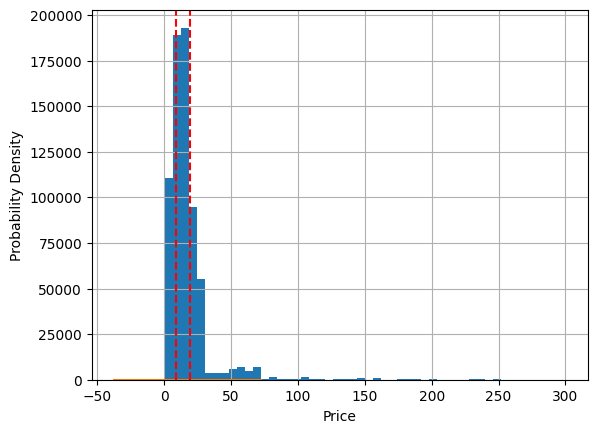

In [241]:
df_stat['price'].hist(bins=50)

# Generate data for the normal distribution
mu = df_stat['price'].mean()
sigma = df_stat['price'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# Plot the normal distribution curve
plt.plot(x, y)
plt.axvline(x=np.percentile(df_stat['price'], 25), color='r', linestyle='--')
plt.axvline(x=np.percentile(df_stat['price'], 75), color='r', linestyle='--')
plt.xlabel('Price')
plt.ylabel('Probability Density')
plt.show()

----
## Test de normalité sur une variable : année de naissance
---

#### H0 : la variable naissance suit une loi normal p > 0,05
#### H1 : la variable naissance ne suit pas une loi normal p < 0,05


In [242]:
# choix de la variable à étudier : année de naissance
df_stat['birth'].head(2)   

Timestamp
2021-03-01 00:01:07.843138    1967
2021-03-01 00:02:26.047414    1960
Name: birth, dtype: int64

In [243]:
print(f"la moyenne (x barre) théorique est {round(df_stat['birth'].mean(), 2)}")
print(f"l'écart type ou stand.dev. (sigma) théorique est {round(df_stat['birth'].std(), 2)}")
print(f"la variance (sigma carré) théorique est de {round(df_stat['birth'].var(), 2)}")

la moyenne (x barre) théorique est 1977.82
l'écart type ou stand.dev. (sigma) théorique est 13.61
la variance (sigma carré) théorique est de 185.18


In [244]:
## Fixation de la taille de l'échantillon       
# Paramètres
marge_erreur = 1
niveau_confiance = 0.95
ecart_type_estime = 13.61  # Écart-type estimé des prix dans votre dataset

# Z-score pour un niveau de confiance de 95%
z_score = 1.96  # Pour un niveau de confiance de 95%

# Taille de l'échantillon
taille_echantillon_naissance = (z_score * ecart_type_estime / marge_erreur) ** 2
taille_echantillon_naissance = math.ceil(taille_echantillon_naissance)  # Arrondir à l'entier supérieur

display("Taille d'échantillon nécessaire :", taille_echantillon_naissance)

"Taille d'échantillon nécessaire :"

712

In [245]:
taille_echantillon_naissance = 750 #je fixe la taille de l'échantillon à 750

sss2 = StratifiedShuffleSplit(n_splits=100, test_size=taille_echantillon_naissance, random_state=9000) #j'initialise l'objet StratifiedShuffleSplit pour générer un échantillon stratifié de 1300 individus

for train_index, test_index in sss.split(df_stat, df_stat['strat_sex_categ_mois']): #je génère l'échantillon stratifié selon la variable sex
    echantillon_stratifie_naissance = df_stat.iloc[test_index] #je récupère l'échantillon stratifié
    
print(echantillon_stratifie_naissance.head(1)) #j'affiche la premières lignes de l'échantillon stratifié
display("-----------------------------")
print(echantillon_stratifie_naissance['strat_sex_categ_mois'].value_counts()) #je vérifie

                           id_prod session_id client_id sex  birth  price  \
Timestamp                                                                   
2022-06-02 15:31:48.781946  0_2231   s_217778    c_3095   m   1981  13.99   

                           categ  month strat_sex_categ_mois  
Timestamp                                                     
2022-06-02 15:31:48.781946     0      6                0_m_6  


'-----------------------------'

strat_sex_categ_mois
0_m_9     39
0_f_9     37
0_f_5     35
0_m_10    35
0_m_5     35
          ..
2_f_12     2
2_m_12     2
2_m_9      2
2_f_9      2
2_f_3      2
Name: count, Length: 72, dtype: int64


In [246]:
moyenne_empirique_naissance = echantillon_stratifie_naissance['birth'].mean() #je calcule la moyenne des années de naissance dans l'échantillon stratifié
display(round(moyenne_empirique_naissance, 2))
variante_empirique_naissance = echantillon_stratifie_naissance['birth'].var() #je calcule la variance des années de naissance dans l'échantillon stratifié
display(round(variante_empirique_naissance, 2))

1977.72

182.84

In [247]:
stat, p_value = kstest(echantillon_stratifie_naissance['birth'], 'norm', args=(moyenne_empirique_naissance, np.sqrt(variante_empirique_naissance))) #je teste la normalité de la distribution des années de naissance dans l'échantillon stratifié

display(f"Le resultat du test de normalité est :", {round(stat, 2)}, 'un resultat proche de 0 indique que la distribution des années de naissance est normale')
display(f"Le resultat du test de normalité est :", {round(p_value, 2)}, ': un resultat supérieur à 0.05 indique que la distribution des années de naissance est normale')

display("-----------------------------")

if p_value > 0.05:
    print("La distribution des années de naissance est normale -> l'hypothèse nulle H0 n'est pas rejetée")
else:
    print("La distribution des années de naissance n'est pas normale -> l'hypothèse nulle H0 est rejetée")

'Le resultat du test de normalité est :'

{0.09}

'un resultat proche de 0 indique que la distribution des années de naissance est normale'

'Le resultat du test de normalité est :'

{0.0}

': un resultat supérieur à 0.05 indique que la distribution des années de naissance est normale'

'-----------------------------'

La distribution des années de naissance n'est pas normale -> l'hypothèse nulle H0 est rejetée


---
### On retiens l'hypothèse alternative H1 : la variable prix ne suit pas une loi normal p > 0.05
---


<div style=" background-color: rgb(343, 197, 37);" >
<h2 style="padding: 10px; color: white; text-align: center" > Representation graphique
</h2>
</div>

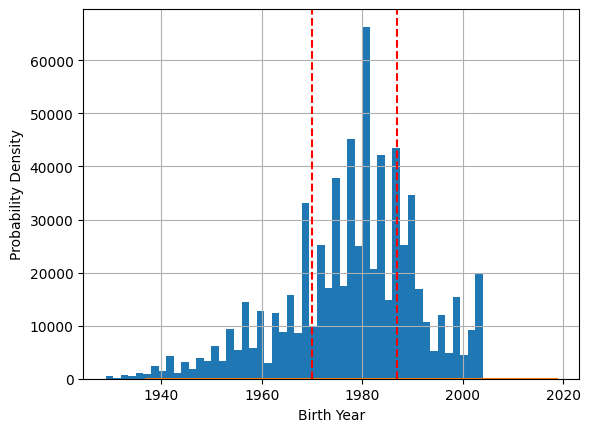

In [248]:
df_stat['birth'].hist(bins=50)

mu = df_stat['birth'].mean()
sigma = df_stat['birth'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

plt.plot(x, y)
plt.axvline(x=np.percentile(df_stat['birth'], 25), color='r', linestyle='--')
plt.axvline(x=np.percentile(df_stat['birth'], 75), color='r', linestyle='--')
plt.xlabel('Birth Year')
plt.ylabel('Probability Density')
plt.show()